In [28]:
import json 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split,cross_val_score,RandomizedSearchCV
from sklearn.metrics import accuracy_score,roc_auc_score,roc_curve,classification_report, confusion_matrix
import xgboost as xgb


In [3]:
df = pd.read_json('transactionsjson.json',lines=True)

In [4]:
df.columns

Index(['accountNumber', 'customerId', 'creditLimit', 'availableMoney',
       'transactionDateTime', 'transactionAmount', 'merchantName',
       'acqCountry', 'merchantCountryCode', 'posEntryMode', 'posConditionCode',
       'merchantCategoryCode', 'currentExpDate', 'accountOpenDate',
       'dateOfLastAddressChange', 'cardCVV', 'enteredCVV', 'cardLast4Digits',
       'transactionType', 'echoBuffer', 'currentBalance', 'merchantCity',
       'merchantState', 'merchantZip', 'cardPresent', 'posOnPremises',
       'recurringAuthInd', 'expirationDateKeyInMatch', 'isFraud'],
      dtype='object')

In [5]:
#Select Relevant Columns  
df_model = df[['creditLimit','availableMoney','transactionAmount','transactionType','currentBalance',
               'posEntryMode','cardPresent','recurringAuthInd','expirationDateKeyInMatch','isFraud',
               'acqCountry','merchantCountryCode','posConditionCode']]

In [6]:
#get dummies
df_dum = pd.get_dummies(df_model,drop_first=True)

In [7]:
df_dum.head()

,creditLimit,availableMoney,transactionAmount,currentBalance,cardPresent,expirationDateKeyInMatch,isFraud,transactionType_ADDRESS_VERIFICATION,transactionType_PURCHASE,transactionType_REVERSAL,...,acqCountry_MEX,acqCountry_PR,acqCountry_US,merchantCountryCode_CAN,merchantCountryCode_MEX,merchantCountryCode_PR,merchantCountryCode_US,posConditionCode_01,posConditionCode_08,posConditionCode_99
0,5000,5000.0,98.55,0.0,False,False,False,0,1,0,...,0,0,1,0,0,0,1,1,0,0
1,5000,5000.0,74.51,0.0,True,False,False,0,1,0,...,0,0,1,0,0,0,1,1,0,0
2,5000,5000.0,7.47,0.0,False,False,False,0,1,0,...,0,0,1,0,0,0,1,1,0,0
3,5000,5000.0,7.47,0.0,False,False,False,0,1,0,...,0,0,1,0,0,0,1,1,0,0
4,5000,5000.0,71.18,0.0,True,False,False,0,1,0,...,0,0,1,0,0,0,1,1,0,0


In [13]:
df_dum.replace(True,1)
df_dum.replace(False,0)

,creditLimit,availableMoney,transactionAmount,currentBalance,cardPresent,expirationDateKeyInMatch,isFraud,transactionType_ADDRESS_VERIFICATION,transactionType_PURCHASE,transactionType_REVERSAL,...,acqCountry_MEX,acqCountry_PR,acqCountry_US,merchantCountryCode_CAN,merchantCountryCode_MEX,merchantCountryCode_PR,merchantCountryCode_US,posConditionCode_01,posConditionCode_08,posConditionCode_99
0,5000,5000.00,98.55,0.00,0.0,0.0,0.0,0,1,0,...,0,0,1,0,0,0,1,1,0,0
1,5000,5000.00,74.51,0.00,1.0,0.0,0.0,0,1,0,...,0,0,1,0,0,0,1,1,0,0
2,5000,5000.00,7.47,0.00,0.0,0.0,0.0,0,1,0,...,0,0,1,0,0,0,1,1,0,0
3,5000,5000.00,7.47,0.00,0.0,0.0,0.0,0,1,0,...,0,0,1,0,0,0,1,1,0,0
4,5000,5000.00,71.18,0.00,1.0,0.0,0.0,0,1,0,...,0,0,1,0,0,0,1,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
786358,50000,48904.96,119.92,1095.04,0.0,0.0,0.0,0,1,0,...,0,0,1,0,0,0,1,1,0,0
786359,50000,48785.04,18.89,1214.96,0.0,0.0,0.0,0,1,0,...,0,0,1,0,0,0,1,1,0,0
786360,50000,48766.15,49.43,1233.85,0.0,0.0,0.0,0,1,0,...,0,0,1,0,0,0,1,1,0,0
786361,50000,48716.72,49.89,1283.28,0.0,0.0,0.0,0,1,0,...,0,0,1,0,0,0,1,0,0,1


In [8]:
df_dum.columns

Index(['creditLimit', 'availableMoney', 'transactionAmount', 'currentBalance',
       'cardPresent', 'expirationDateKeyInMatch', 'isFraud',
       'transactionType_ADDRESS_VERIFICATION', 'transactionType_PURCHASE',
       'transactionType_REVERSAL', 'posEntryMode_02', 'posEntryMode_05',
       'posEntryMode_09', 'posEntryMode_80', 'posEntryMode_90',
       'acqCountry_CAN', 'acqCountry_MEX', 'acqCountry_PR', 'acqCountry_US',
       'merchantCountryCode_CAN', 'merchantCountryCode_MEX',
       'merchantCountryCode_PR', 'merchantCountryCode_US',
       'posConditionCode_01', 'posConditionCode_08', 'posConditionCode_99'],
      dtype='object')

In [9]:
set(df_dum.columns)

{'acqCountry_CAN',
 'acqCountry_MEX',
 'acqCountry_PR',
 'acqCountry_US',
 'availableMoney',
 'cardPresent',
 'creditLimit',
 'currentBalance',
 'expirationDateKeyInMatch',
 'isFraud',
 'merchantCountryCode_CAN',
 'merchantCountryCode_MEX',
 'merchantCountryCode_PR',
 'merchantCountryCode_US',
 'posConditionCode_01',
 'posConditionCode_08',
 'posConditionCode_99',
 'posEntryMode_02',
 'posEntryMode_05',
 'posEntryMode_09',
 'posEntryMode_80',
 'posEntryMode_90',
 'transactionAmount',
 'transactionType_ADDRESS_VERIFICATION',
 'transactionType_PURCHASE',
 'transactionType_REVERSAL'}

In [9]:
len(df_dum.columns)

26

In [10]:
len(set(df_dum.columns))

26

In [11]:
#split data 

X = df_dum.drop('isFraud', axis=1)
y = df_dum.isFraud


In [79]:
#Train Test Split 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state=123,)

In [ ]:
#Run XGBClassifier  start with some values to get a baseline.  Then get feature importantce. Then tune Hyperparameters.



In [80]:
xgbcl = xgb.XGBClassifier(objective='binary:logistic',
                         tree_method='gpu_hist')

# Fit the classifier to the training set
xgbcl.fit(X_train, y_train)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=0,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.300000012, max_delta_step=0, max_depth=6,
              min_child_weight=1, missing=nan,
              monotone_constraints='(0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0)',
              n_estimators=100, n_jobs=0, num_parallel_tree=1, random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='gpu_hist', validate_parameters=1, verbosity=None)

In [81]:
# Predict the labels of the test set: preds
y_pred = xgbcl.predict(X_test)

# Compute the accuracy: accuracy
accuracy = float(np.sum(y_pred==y_test))/y_test.shape[0]
print("accuracy: %f" % (accuracy))




accuracy: 0.984130


In [82]:
#print confusion matrix, classification report
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[154776      2]
 [  2494      1]]
              precision    recall  f1-score   support

       False       0.98      1.00      0.99    154778
        True       0.33      0.00      0.00      2495

    accuracy                           0.98    157273
   macro avg       0.66      0.50      0.50    157273
weighted avg       0.97      0.98      0.98    157273



In [99]:
#get area under curve (AUC) 
dmatrix = xgb.DMatrix(data=X, label=y)
params = {"objective":"binary:logistic"}
#Perform cross_validation: cv_results
cv_results = xgb.cv(dtrain=dmatrix, params=params, 
                    nfold=5, num_boost_round=20, 
                    metrics="auc", as_pandas=True, seed=123)

# Print cv_results
print(cv_results)

# Print the AUC
print((cv_results["test-auc-mean"]).iloc[-1])


    train-auc-mean  train-auc-std  test-auc-mean  test-auc-std
0         0.715408       0.001241       0.713897      0.003956
1         0.728149       0.002828       0.724931      0.003980
2         0.733270       0.001663       0.729546      0.002982
3         0.736081       0.000521       0.732225      0.002115
4         0.737430       0.000510       0.733050      0.002029
5         0.739086       0.000434       0.733532      0.002004
6         0.740223       0.000403       0.733929      0.001657
7         0.741779       0.000172       0.734162      0.001927
8         0.743835       0.000535       0.734450      0.002349
9         0.745856       0.000242       0.735304      0.002260
10        0.747431       0.000503       0.735657      0.001889
11        0.749047       0.000372       0.735707      0.001757
12        0.750749       0.000666       0.736178      0.001553
13        0.752499       0.000665       0.736762      0.001209
14        0.754164       0.000925       0.737268      0

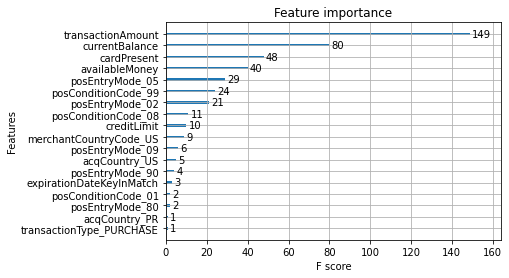

In [100]:
#What are the most important features in the dataset relating to fraud.  
dmatrix = xgb.DMatrix(data=X, label=y)

# Create the parameter dictionary: params
params = {"objective":"binary:logistic"}

# Train the model: 
xg_reg = xgb.train(params=params, dtrain=dmatrix, num_boost_round=10)

# Plot the feature importances
xgb.plot_importance(xg_reg)
plt.show()

In [ ]:
#It appears transaction amount is a very significant factor for determining fraud in this dataset.

In [64]:
#Measure Accuracy 

# Create the parameter dictionary: params
params = {"objective":"binary:logistic"}

# Perform cross-validation: cv_results
cv_results = xgb.cv(dtrain=dmatrix, params=params, 
                  nfold=3, num_boost_round=5, 
                  metrics="error", as_pandas=True, seed=123)

# Print cv_results
print(cv_results)

# Print the accuracy
print(((1-cv_results["test-error-mean"]).iloc[-1]))



   train-error-mean  train-error-std  test-error-mean  test-error-std
0          0.015789         0.000061         0.015791        0.000120
1          0.015789         0.000060         0.015793        0.000122
2          0.015789         0.000060         0.015793        0.000122
3          0.015790         0.000060         0.015793        0.000122
4          0.015790         0.000060         0.015793        0.000122
0.9842073333333333


In [86]:
#tune some hyperparameters.

param_grid = {
    
    'max_depth':range(3,10,1),
 'min_child_weight':range(1,6,1)
    
}
xgb1 = xgb.XGBClassifier(objective="binary:logistic",
                         tree_method='gpu_hist')

xgb1_cv = RandomizedSearchCV(estimator=xgb1,
                             param_distributions=param_grid,
                             cv=3,
                             scoring='roc_auc',
                             verbose=1,random_state=123)

xgb1_cv.fit(X_train, y_train)

print(xgb1_cv.best_params_)
print(xgb1_cv.best_score_)
print(xgb1_cv.scorer_)

Fitting 3 folds for each of 10 candidates, totalling 30 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  30 out of  30 | elapsed:  1.7min finished


{'min_child_weight': 1, 'max_depth': 4}
0.739547114890156
make_scorer(roc_auc_score, needs_threshold=True)


In [87]:
#tune gamma 

param_grid = {
    
   'gamma':[i/10.0 for i in range(0,5)]
    
}
xgb2 = xgb.XGBClassifier(objective="binary:logistic",max_depth=4,
                         min_child_weight=1,
                         tree_method='gpu_hist')

xgb2_cv = RandomizedSearchCV(estimator=xgb2,
                             param_distributions=param_grid,
                             scoring='roc_auc',
                             verbose=1,random_state=123)

xgb2_cv.fit(X_train, y_train)

print(xgb2_cv.best_params_)
print(xgb2_cv.best_score_)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:282: UserWarning: The total space of parameters 5 is smaller than n_iter=10. Running 5 iterations. For exhaustive searches, use GridSearchCV.
  % (grid_size, self.n_iter, grid_size), UserWarning)
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


Fitting 5 folds for each of 5 candidates, totalling 25 fits


[Parallel(n_jobs=1)]: Done  25 out of  25 | elapsed:  1.2min finished


{'gamma': 0.4}
0.7406437583819843


In [92]:
#Test AUC with new optimized parameters

params = {
    "objective": "binary:logistic",
    "max_depth": 4,
    'min_child_weight': 1,
    'gamma': .4,
    'tree_method': 'gpu_hist'
}
#Perform cross_validation: cv_results
cv_results = xgb.cv(dtrain=dmatrix,
                    params=params,
                    nfold=5,
                    num_boost_round=20,
                    metrics="auc",
                    as_pandas=True,
                    seed=123)

# Print cv_results
print(cv_results)

# Print the AUC
print((cv_results["test-auc-mean"]).iloc[-1])

    train-auc-mean  train-auc-std  test-auc-mean  test-auc-std
0         0.711783       0.001592       0.710731      0.003505
1         0.724598       0.002766       0.723307      0.003699
2         0.728424       0.001012       0.726780      0.002156
3         0.729534       0.000621       0.727336      0.002523
4         0.730829       0.000750       0.729158      0.001920
5         0.731245       0.000556       0.729726      0.002076
6         0.731701       0.000385       0.730045      0.002211
7         0.732536       0.000568       0.730303      0.002380
8         0.733083       0.000652       0.730710      0.002063
9         0.734193       0.000588       0.731335      0.002047
10        0.735131       0.000526       0.732209      0.001450
11        0.735766       0.000520       0.732290      0.001212
12        0.736149       0.000630       0.732719      0.001407
13        0.736960       0.000552       0.733351      0.001439
14        0.737884       0.000591       0.733942      0

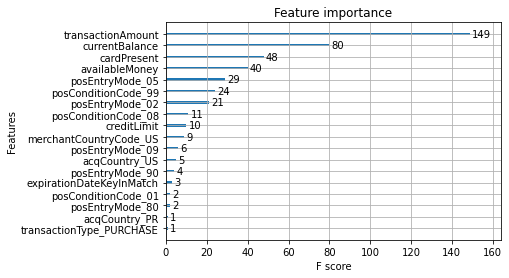

In [94]:
xg_reg1 = xgb.train(params=params, dtrain=dmatrix, num_boost_round=10)

# Plot the feature importances
xgb.plot_importance(xg_reg1)
plt.show()

In [98]:
params = {
    "objective": 'binary:logitraw',
    "max_depth": 4,
    'min_child_weight': 1,
    'gamma': .4,
    'tree_method': 'gpu_hist'
}
#Perform cross_validation: cv_results
cv_results = xgb.cv(dtrain=dmatrix,
                    params=params,
                    nfold=5,
                    num_boost_round=20,
                    metrics="auc",
                    as_pandas=True,
                    seed=123)

# Print cv_results
print(cv_results)

# Print the AUC
print((cv_results["test-auc-mean"]).iloc[-1])

    train-auc-mean  train-auc-std  test-auc-mean  test-auc-std
0         0.711783       0.001592       0.710731      0.003505
1         0.724598       0.002766       0.723307      0.003699
2         0.728424       0.001012       0.726780      0.002156
3         0.729534       0.000621       0.727336      0.002523
4         0.730829       0.000750       0.729158      0.001920
5         0.731245       0.000556       0.729726      0.002076
6         0.731701       0.000385       0.730045      0.002211
7         0.732536       0.000568       0.730303      0.002380
8         0.733083       0.000652       0.730710      0.002063
9         0.734193       0.000588       0.731335      0.002047
10        0.735131       0.000526       0.732209      0.001450
11        0.735766       0.000520       0.732290      0.001212
12        0.736149       0.000630       0.732719      0.001407
13        0.736960       0.000552       0.733351      0.001439
14        0.737884       0.000591       0.733942      0

In [101]:



xgb3 = xgb.XGBClassifier(objective="binary:logistic",
                         max_depth=3,
                         min_child_weight=1,
                         gamma=.4,
                         tree_method='gpu_hist')


xgb3.fit(X_train, y_train)



y_pred3 = xgb3.predict(X_test)
print(confusion_matrix(y_test, y_pred3))
print(classification_report(y_test, y_pred3))


[[154778      0]
 [  2494      1]]
              precision    recall  f1-score   support

       False       0.98      1.00      0.99    154778
        True       1.00      0.00      0.00      2495

    accuracy                           0.98    157273
   macro avg       0.99      0.50      0.50    157273
weighted avg       0.98      0.98      0.98    157273



In [ ]:


# Setup the hyperparameter grid
c_space = np.logspace(-5, 8, 15)
param_grid = {'C': c_space}

# Instantiate a logistic regression classifier: logreg
logreg = LogisticRegression(max_iter=10000)

# Instantiate the GridSearchCV object: logreg_cv
logreg_cv = RandomizedSearchCV(logreg, param_grid, cv=5)

# Fit it to the data
logreg_cv.fit(X_train, y_train)

# Print the tuned parameter and score
print("Tuned Logistic Regression Parameters: {}".format(logreg_cv.best_params_))
print("Best score is {}".format(logreg_cv.best_score_))


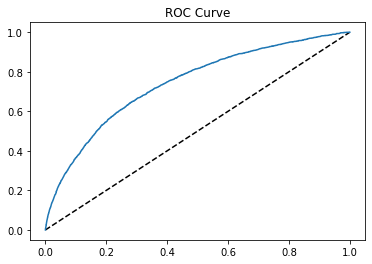

In [102]:
from sklearn.metrics import roc_curve
from sklearn.linear_model import LogisticRegression
# Compute predicted probabilities: y_pred_prob
y_pred_prob = xgb3.predict_proba(X_test)[:,1]

# Generate ROC curve values: fpr, tpr, thresholds
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)

# Plot ROC curve
plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr, tpr)
plt.title('ROC Curve')
plt.show()

In [ ]:
from sklearn.model_selection import cross_val_score
from sklearn.metrics import roc_auc_score

# Compute predicted probabilities: y_pred_prob
y_pred_prob = logreg.predict_proba(X_test)[:,1]

# Compute and print AUC score
print("AUC: {}".format(roc_auc_score(y_test, y_pred_prob)))

# Compute cross-validated AUC scores: cv_auc
cv_auc = cross_val_score(logreg,X,y,scoring='roc_auc',cv=5)

# Print list of AUC scores
print("AUC scores computed using 5-fold cross-validation: {}".format(cv_auc))

In [ ]:
# Setup the pipeline
steps = [('scaler', StandardScaler()),
         ('SVM', SVC())]
# Create the pipeline: pipeline 
pipeline = Pipeline(steps)

# Specify the hyperparameter space
parameters = {'SVM__C':[1, 10, 100],
              'SVM__gamma':[0.1, 0.01]}

# Create train and test sets
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=.2,random_state=21)

# Instantiate the GridSearchCV object: cv
cv = GridSearchCV(pipeline,parameters,cv=3)

# Fit to the training set
cv.fit(X_train,y_train)

# Predict the labels of the test set: y_pred
y_pred = cv.predict(X_test)

# Compute and print metrics
print("Accuracy: {}".format(cv.score(X_test, y_test)))
print(classification_report(y_test, y_pred))
print("Tuned Model Parameters: {}".format(cv.best_params_))